## **Model Testing**

In [15]:
from tensorflow.keras.models import load_model
# from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import plot_model


In [2]:
model = load_model('mp_hand_gesture')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 42)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2752      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [16]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


---

## **Media Pipe Testing**

In [1]:
import mediapipe as mp
import cv2
import numpy as np

In [2]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [3]:
print(hands)

In [5]:
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape
    # print("Frame Shape: ", x, y, c)

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)  
    className = 'Test'

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []
        for handslms in result.multi_hand_landmarks:
            # print("L: ", handslms.landmark)
            for lm in handslms.landmark:
                # print(lm)
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)

                landmarks.append([lmx,lmy])

            # Drawing landmarks on frames
            mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)
        print(np.array(landmarks).shape)
    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(42, 2)
(21, 2)
(21, 2)
(21, 2)


In [68]:
cap.release()

cv2.destroyAllWindows()

### **Testing Holistic**

In [18]:
mp_holistic = mp.solutions.holistic # Holistic model
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape
    # print("Frame Shape: ", x, y, c)

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)  
    className = 'Test'

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []

        if(len(result.multi_hand_landmarks)==1):
            for handslms in result.multi_hand_landmarks:
                for lm in handslms.landmark:
                    # print(id, lm)
                    lmx = int(lm.x * x)
                    lmy = int(lm.y * y)

                    landmarks.append([lmx, 0, lmy, 0])

                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)
        else:

            # print("A: ", result.multi_hand_landmarks[0].landmark, \
            #     "Type: ", type(result.multi_hand_landmarks[0].landmark), list(result.multi_hand_landmarks[0].landmark))

            for lm1, lm2 in zip(list(result.multi_hand_landmarks[0].landmark), list(result.multi_hand_landmarks[1].landmark)):
                # for lm1, lm2 in handslms1.landmark, handslms2.landmark:
                    # print(id, lm)
                lmx1 = int(lm1.x * x)
                lmy1 = int(lm1.y * y)
                lmx2 = int(lm2.x * x)
                lmy2 = int(lm2.y * y)
                landmarks.append([lmx1, lmy, lmx2, lmy2])

                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)
                

        print(np.array(landmarks).shape, landmarks)
    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape
    # print("Frame Shape: ", x, y, c)

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = holistic.process(framergb)  
    className = 'Test'

    # post process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        
        print("Initial: ", np.array(lh).shape, np.array(rh).shape)
        for i in range(len(lh)):
            landmarks.append(np.append(lh[i], rh[i]).tolist())
        
        # Drawing landmarks on frames

        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

        print(np.array(landmarks).shape)
        # print(landmarks)

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

In [61]:
cap.release()

cv2.destroyAllWindows()

In [56]:
tmp = np.zeros(21*2).reshape(-1,2).tolist()
tmp_1 = np.ones(21*2).reshape(-1,2).tolist()

print("Tmp:\n", tmp )
print("Tmp_1:\n", tmp_1 )

Tmp:
 [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]
Tmp_1:
 [[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]


In [57]:
for i in range(len(tmp)):
    tmp[i] = np.append(tmp[i], tmp_1[i]).tolist()
    # tmp[i] = tmp[i]

print(tmp)

[[0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0]]


---

## **Testing Data Collection**

In [6]:
import os
import mediapipe as mp 
import numpy as np
import cv2

In [64]:
# mp_holistic = mp.solutions.holistic # Holistic model
# mp_drawing = mp.solutions.drawing_utils # Drawing utilities

mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.7)

mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape
    # print("Frame Shape: ", x, y, c)

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = holistic.process(framergb)  
    className = 'Test'

    # post process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        
        print("Initial: ", np.array(lh).shape, np.array(rh).shape)
        for i in range(len(lh)):
            landmarks.append(np.append(lh[i], rh[i]).tolist())
        
        # Drawing landmarks on frames

        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

        print(np.array(landmarks).shape)
        # print(landmarks)

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()
cv2.destroyAllWindows()

In [66]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello', 'Love', 'Understand', 'Thanks', 'Some'])
# actions = np.array(['Home', 'Name', 'Understand', 'Thanks'])


# Thirty videos worth of data
no_sequences =  25

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [67]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [69]:
cap = cv2.VideoCapture(0)
    
# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame vertically
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = holistic.process(framergb)  
            className = ''
            
            # post process the result
            if result.left_hand_landmarks or result.right_hand_landmarks:
                landmarks = []

                lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                
                print("Initial: ", np.array(lh).shape, np.array(rh).shape)
                for i in range(len(lh)):
                    landmarks.append(np.append(lh[i], rh[i]).tolist())
                
                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
                mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            -cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (21, 2) (21, 2)
Initial:  (2

In [15]:
cap.release()
cv2.destroyAllWindows()

---

### **Data Formating**

In [70]:
import os
import pandas as pd
os.getcwd()

'd:\\VIT\\SEM-8\\Main Code'

In [71]:
tmp = np.load("./MP_Data/Hello/1/0.npy")
print(tmp.shape)
ee = tmp.flatten()
print(ee.shape)

(21, 4)
(84,)


In [72]:
list_of_files = {}
for (dirpath, dirnames, filenames) in os.walk("MP_Data"):
    # print(dirpath, "\n", dirnames, "\n", len(filenames))
    if(len(filenames)!=30):
         print(dirpath, "\n", len(filenames))

MP_Data 
 0
MP_Data\Hello 
 0
MP_Data\Hello\0 
 29
MP_Data\Love 
 0
MP_Data\Some 
 0
MP_Data\Some\2 
 28
MP_Data\Thanks 
 0
MP_Data\Understand 
 0
MP_Data\Understand\10 
 22


In [73]:
# actions = np.array(['Hello', 'Love', 'Understand', 'Thanks'])
label_map = {label:num for num, label in enumerate(actions)}
print(label_map)

{'Hello': 0, 'Love': 1, 'Understand': 2, 'Thanks': 3, 'Some': 4}


In [74]:
data = []
labels = []

for action in actions:
    for (dirpath, dirnames, filenames) in os.walk(os.path.join("MP_Data", action)):
        if(len(dirnames)==0):
            for filename in filenames:
                data.append(np.load( os.path.join(dirpath, filename) ))
                labels.append(label_map[action])

data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(3739, 21, 4)
(3739,)


In [75]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 749, 1: 750, 2: 742, 3: 750, 4: 748}


In [77]:
# from tensorflow.keras.utils.np_utils import to_categorical
import tensorflow as tf

lab = tf.keras.utils.to_categorical(labels)
print(lab.shape)

(3739, 5)


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, lab, test_size=0.2, random_state=42)

unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

{0: 580, 1: 613, 2: 596, 3: 610, 4: 592}
{0: 169, 1: 137, 2: 146, 3: 140, 4: 156}


In [79]:
print("Training: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Training:  (2991, 21, 4) (2991, 5)
Test:  (748, 21, 4) (748, 5)


---

## **Model Training**

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

from tensorflow.keras.callbacks import ModelCheckpoint


In [81]:
model = Sequential([
    Flatten(input_shape=(21, X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 84)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                5440      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 1

In [82]:
callback_checkpoint = ModelCheckpoint(
    './checkpoints/', monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch',
)

In [83]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    callbacks=[callback_checkpoint])

Epoch 1/50
94/94 [==============================] - 1s 3ms/step - loss: 0.9444 - accuracy: 0.5710
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7817
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8713
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8780
Epoch 5/50
94/94 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9308
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.9535
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9786
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9836
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9866
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9766
Epoch 11/50
94/94 [

In [85]:
model.save("./checkpoints/two_hand_5_model")

INFO:tensorflow:Assets written to: ./checkpoints/two_hand_5_model\assets


---

## **Metrics**

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
y_pred = model.predict(X_test)
y_preds = np.argmax(y_pred, axis=1)
print(y_preds[:10])

[1 0 0 1 2 0 0 0 4 4]


In [88]:
unique, counts = np.unique(y_preds, return_counts=True)
print(dict(zip(unique, counts)))

{0: 169, 1: 137, 2: 148, 3: 138, 4: 156}


In [89]:
def evaluate_model(history,X_test,y_test,model):
  """
    Input: 
      history - Model history variable
      X_test - Test features
      y_test - Target test variables
      model - Keras Model 

    Output:
      Accuracy Plot (Training + Validation)
      Loss Plot (Training + Validation)
      Confusion matrix
      Accuracy
      Classification Report 
  """  
  scores = model.evaluate((X_test),y_test, verbose=0)
  
  fig, axs = plt.subplots(1,3, figsize=(18,5))
  fig.tight_layout()

  axs[0].plot(history.history['accuracy'])
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Model - Accuracy')
  axs[0].legend(['Training'], loc='lower right')

  axs[1].plot(history.history['loss'])
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Model Loss')
  axs[1].set_title('Model - Loss')
  axs[1].legend(['Training'], loc='upper right')

  target_names=actions
  
  y_true=[]
  for element in y_test:
      y_true.append(np.argmax(element))
  prediction_proba = model.predict(X_test)
  prediction = np.argmax(prediction_proba,axis=1)
  cnf_matrix = confusion_matrix(y_true, prediction)    
  g = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', ax=axs[2],
                  xticklabels=target_names, yticklabels=target_names)
  plt.show()

  print("\nAccuracy: %.2f%% \n" % (scores[1]*100))
  print(classification_report(y_true, prediction, target_names=target_names))
    

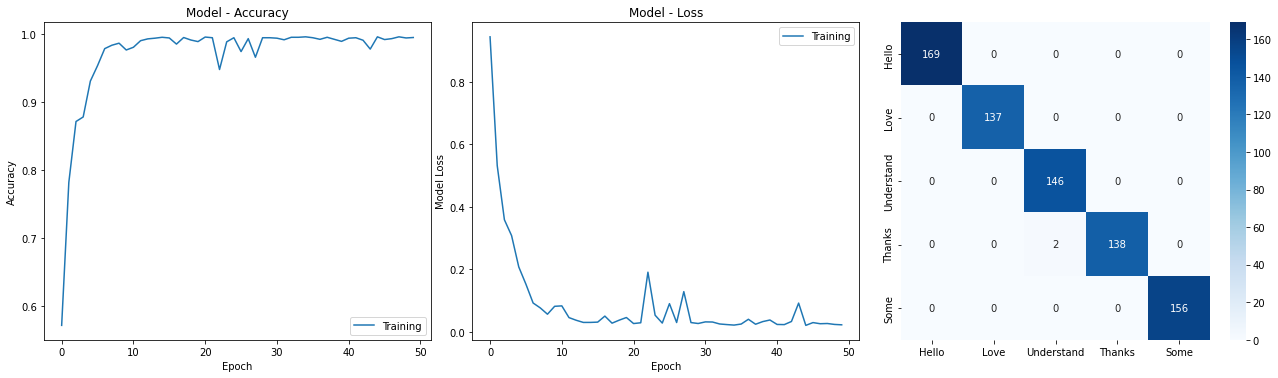


Accuracy: 99.73% 

              precision    recall  f1-score   support

       Hello       1.00      1.00      1.00       169
        Love       1.00      1.00      1.00       137
  Understand       0.99      1.00      0.99       146
      Thanks       1.00      0.99      0.99       140
        Some       1.00      1.00      1.00       156

    accuracy                           1.00       748
   macro avg       1.00      1.00      1.00       748
weighted avg       1.00      1.00      1.00       748



In [90]:
evaluate_model(history, X_test, y_test, model)

---

## **Testing Video**

In [238]:
# import necessary packages

import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# initialize mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('checkpoints\\two_hand_5_model')

# Load class names
# f = open('gesture.names', 'r')
# classNames = f.read().split('\n')
# f.close()
classNames = actions
print(classNames)


# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = holistic.process(framergb)     
    className = ''

    # post process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        
        # print("Initial: ", np.array(lh).shape, np.array(rh).shape)
        for i in range(len(lh)):
            landmarks.append(np.append(lh[i], rh[i]).tolist())
        
        # Drawing landmarks on frames
        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


        # Predict gesture
        prediction = model.predict([landmarks])
        # print(prediction)
        classID = np.argmax(prediction)
        className = classNames[classID]

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

['Hello' 'Love' 'Understand' 'Thanks' 'Some']
